### Part 1

#### 1. Download the csv

#### 2. Replace NANs

In [1]:
import pandas as pd
import numpy as np

tested = pd.read_csv("tested.csv")

tested['Age'].fillna(tested['Age'].median(), inplace = True)

# tested
# tested.dtypes
tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### 3. Do you think Gender/Sex matters on whether a passenger will survive in Titanic Incident? And why is that? Do you have evidence, or have you heard some stories?

I think gender/sex matters on whetheer a passenger will survive in Titanic Incident. Because most of the female survived. The evidence is this data set. One story I heard is "woman and children first" to go to the lifeboat when the accident happened. 

#### 4. Which model will you use on this dataset? And why did you choose them?

I will use logistic regression model on this dataset. From the lecture, we learned that the logistic regression model arises from the desire to model the posterior probabilities of the K classes via linear functions in x, while at the same time ensuring that they sum to one and remain in [0, 1].

#### 5. Convert the “Sex” column from “object” to “numeric

In [2]:
tested['Sex'] = tested['Sex'].replace(['female', 'male'], [0, 1])
tested.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 6. Which variables will you choose as inputs to build the model? Why?

To build this model, I would like to use 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' as input variabels. Because their data types are int64 and float64. Did not use 'PassengerId' becuase it is not meaningful. 

#### 7. Replace NANs

In [3]:
# tested.info()
# Fare column has one NAN, replace with average
tested['Fare'].fillna(tested['Fare'].mean(), inplace = True)
tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


#### 8. Build the model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = tested.Survived
X = tested[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      train_size = 0.8, 
                                                      test_size = 0.2, 
                                                      random_state = 0)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
regressor.coef_

array([[-3.85713541e-02, -6.30464028e+00, -6.26347668e-03,
         4.77925144e-02,  1.02030635e-01,  2.49346810e-03]])

In [5]:
regressor.intercept_

array([2.91281388])

#### 9. Does this model have an “accuracy rate”? Explain why. 

Logistic regression model has an accuracy rate. However, all the female in this dataset survived, and all male did not survived, so we could have an accuracy rate of 1.0. 

#### 10. What is the accuracy rate of the model on valid set? Is it good? 

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, regressor.predict(X_valid))

1.0

A 1.0 accuracy score means the model is overfitting. (all female survived, all male did not)

#### 11. Make up an imaginary individual, and use markdown cells to give a brief introduction of this individual (such as Sex, Age, Fare, etc.). Will this individual survive? 

In [7]:
imaginary_individual = pd.DataFrame([{'Pclass': 3, 'Sex': 1, 
                                      'Age': 25.0, 'SibSp': 2, 
                                      'Parch': 0, 'Fare': 9.33}])
regressor.predict(imaginary_individual)

array([0])

Our imaginary individual is in the 3 pclass, male, 25 years old, with sibsp 2, parch 0, and fare 9.33. He will not survive. 

### Part 2

#### 1. Download the csv

#### 2. This dataset is plain and simple, the output should be “Price”, and input should be “Area”, “Room”, “Lon”, and “Lat”. Check if there are any NANs in these variables, if there is, then replace the NANs with Mean

In [8]:
price = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

# price.info()
# 920 Non-Null for 'Price'

price['Price'].fillna(price['Price'].mean(), inplace = True)
price.info()
# no NANs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       924 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


#### 3. Split the dataset into Train and Valid sets. Calculate the CV score of the Train sets for Linear Regression, Polynomial Regression (degree 1 to 4), Lasso Regression, Ridge Regression, KN Regression, Decision Tree Regression, and Random Forest Regression. 

In [9]:
# Split the dataset
y = price.Price
X = price[['Area', 'Room', 'Lon', 'Lat']]
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      train_size = 0.8, 
                                                      test_size = 0.2, 
                                                      random_state = 0)
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, y_train, cv = 5))

0.6425900393664007

(<matplotlib.collections.PathCollection at 0x7f93808d2490>, 0.4165034731193647)

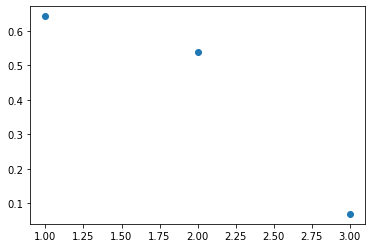

In [10]:
# Polynomial Regression (degree 1 to 4)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_poly = poly_features.fit_transform(X_train)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, X_poly, y_train, cv = 5))

poly_cv = []

for i in range(1, 4):
    poly_cv.append(create_polynomial_regression_model(i))   
plt.scatter(range(1, 4), poly_cv), np.mean(poly_cv)

In [11]:
# Lasso Regression
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv = 5).fit(X_train, y_train)
lasso.score(X_train, y_train)

0.6675758860985703

In [12]:
# Ridge Regression
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv = 5).fit(X_train, y_train)
ridge.score(X_train, y_train)

0.6723645426378053

(<matplotlib.collections.PathCollection at 0x7f9373785c40>, 0.5956118601477818)

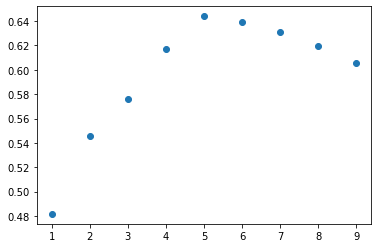

In [13]:
# KN Regression
from sklearn.neighbors import KNeighborsRegressor

cv_score=[]

for i in range(1, 10):
 knn = KNeighborsRegressor(n_neighbors= i)
 cv_score.append(np.mean(cross_val_score(knn, X_train, 
                                         y_train, cv = 5)))
x = range(1, 10)
plt.scatter(x, cv_score), np.mean(cv_score)

In [14]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
np.mean(cross_val_score(dt, X_train, y_train, cv=5))

0.471392870550018

In [15]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, cv = 5))

0.7002526228962572

#### 4. Which model will you choose and why? 

Highest score is Random Forest, we use it as our model and make prediction

#### 5. Make up an imaginary house, and use the .predict function to predict the price of it with the model you choose. 

In [16]:
# np.mean(price['Area'])
# np.mean(price['Room'])
# np.mean(price['Lon'])
# np.mean(price['Lat'])

imaginary_house = pd.DataFrame([{'Area': 96, 'Room': 4, 
                                 'Lon': 5,  'Lat': 52}])
rf.fit(X_train, y_train)
rf.predict(imaginary_house)

array([348690.01])